## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>



## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

1. Neighbourhood groups with highest count among all.
2. Availability of rooms in different areas.
3. Analysis of various rooms type in different areas.
4. Neighbourhood group analysis based on Latitude and Longitude.
5. Price Exploration in neighbourhood group and neighbourhood
6. Price variation based on neighbourhood group and availability_365.
7. Relation between neighbourhood group and Availability of number of days for room.
8. Number of Property owned by each neighbourhood groups.
9. Different rooms distribution based on neighbourhood groups.
10. Correlation among different data sets(columns).
11. Which hosts are the busiest and why?
12. What can we learn from predictions? (ex: locations, prices, reviews, etc)
13. Is there any noticeable difference of traffic among different areas and what could be the reason for it?
14. What can we learn about different hosts and areas?




# Why we need Airbnb Booking analysis ?

Airbnb, is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.

Airbnb makes money by charging guests and hosts for short-term rental stays in private homes or apartments booked through the Airbnb website.The short-term rental business has seen good growth in the past decade.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world.  Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.



# Analysis of some queries related to Airbnb Bookings

In [22]:
import pandas as pd
import numpy as np
import ast

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [26]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape of dataset: (48895, 16)
Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

Missing values per column:
 last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


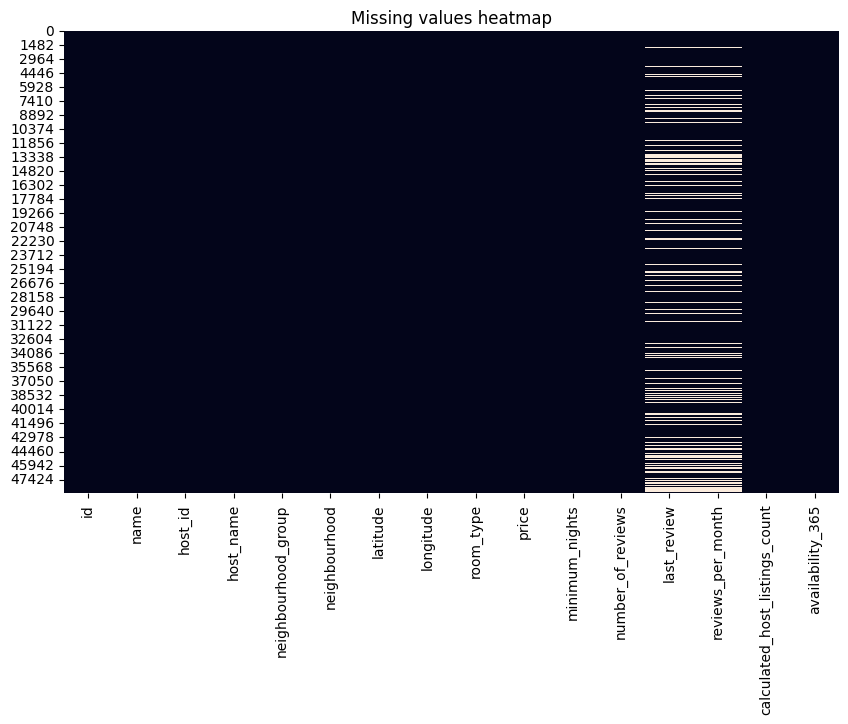

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values heatmap")
plt.show()

In [29]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [30]:
df['last_review'] = df['last_review'].fillna('No Review')

In [31]:
df['host_name'] = df['host_name'].fillna('Unknown')
df['name'] = df['name'].fillna('Unknown')

In [32]:
missing_after = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column after cleaning:\n", missing_after)

Missing values per column after cleaning:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


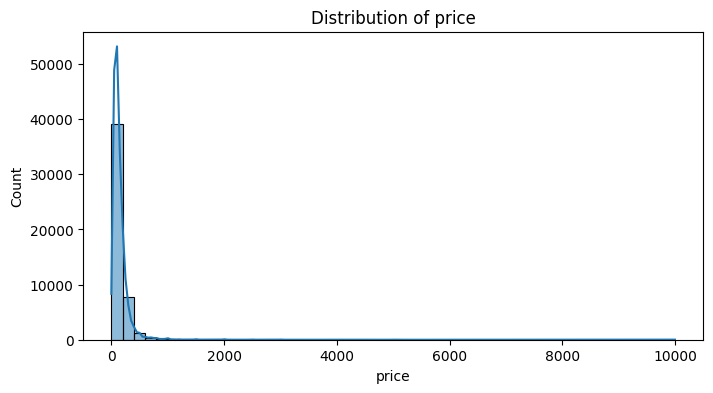

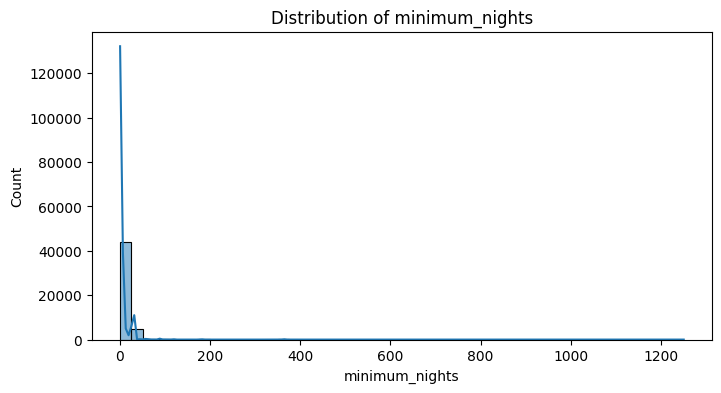

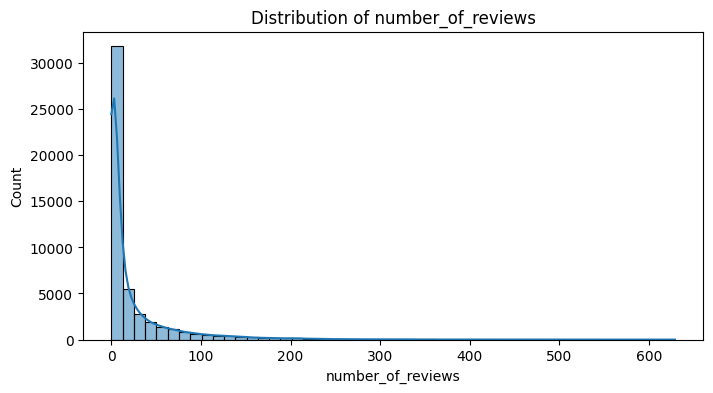

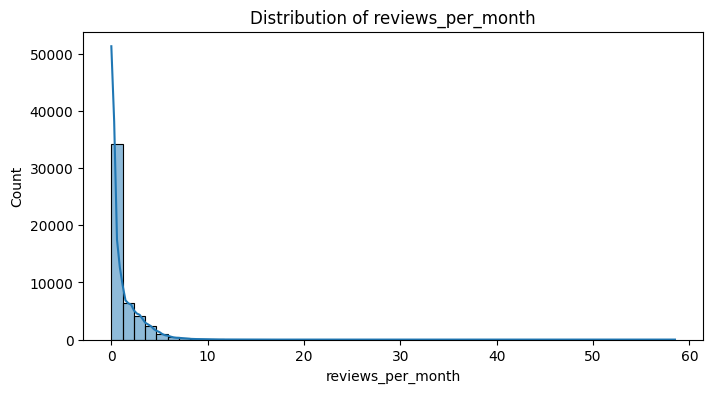

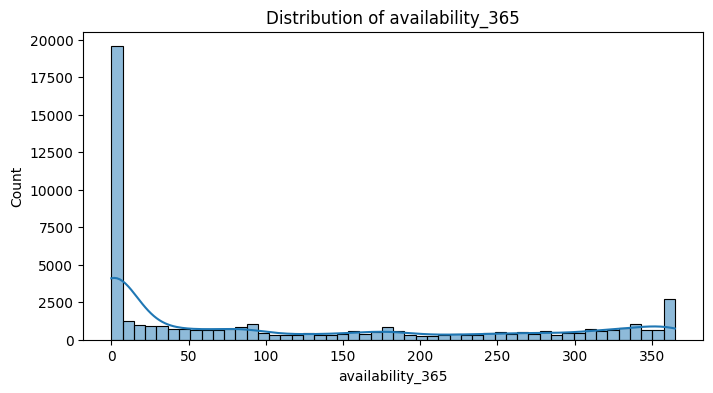

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()



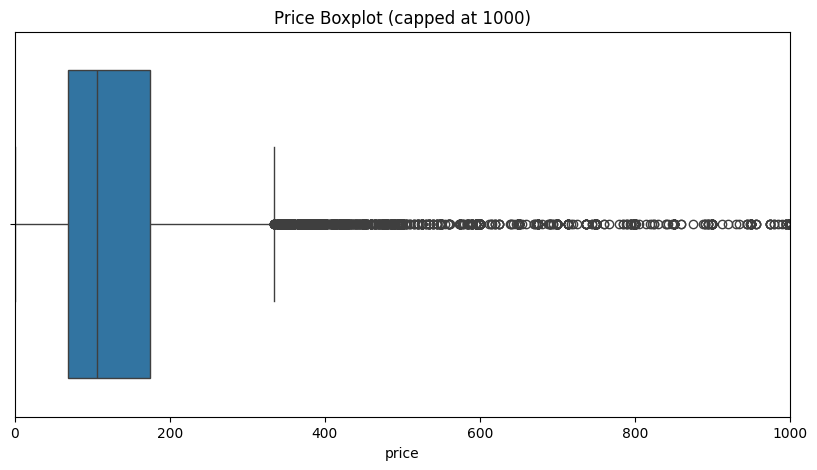

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.xlim(0,1000)
plt.title("Price Boxplot (capped at 1000)")
plt.show()


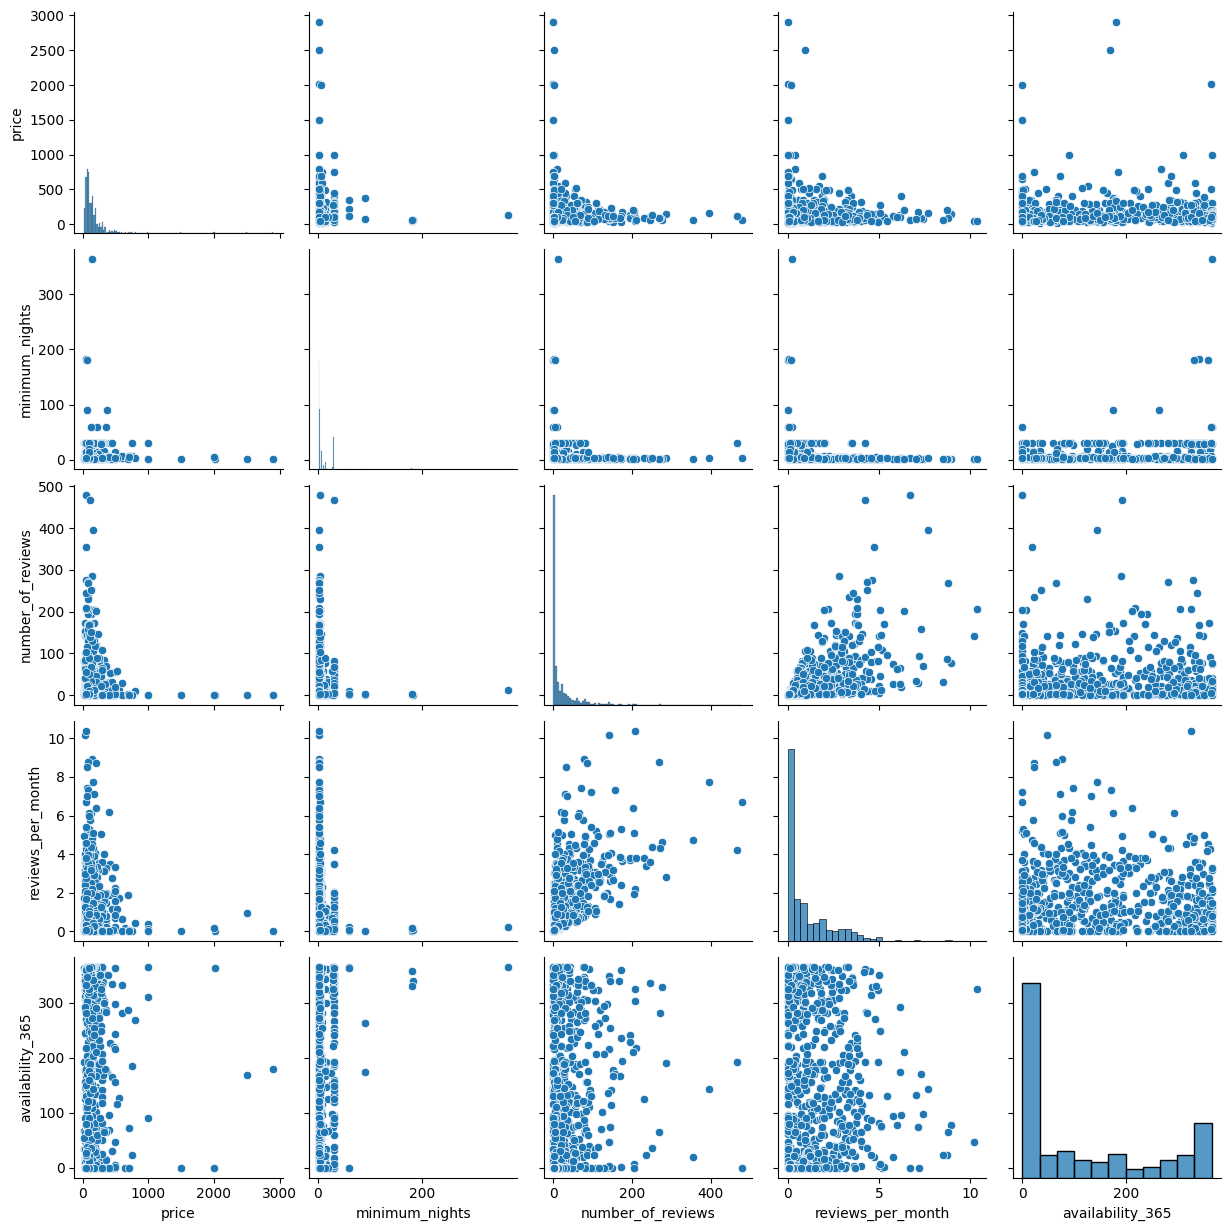

In [35]:
sns.pairplot(df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].sample(1000))
plt.show()

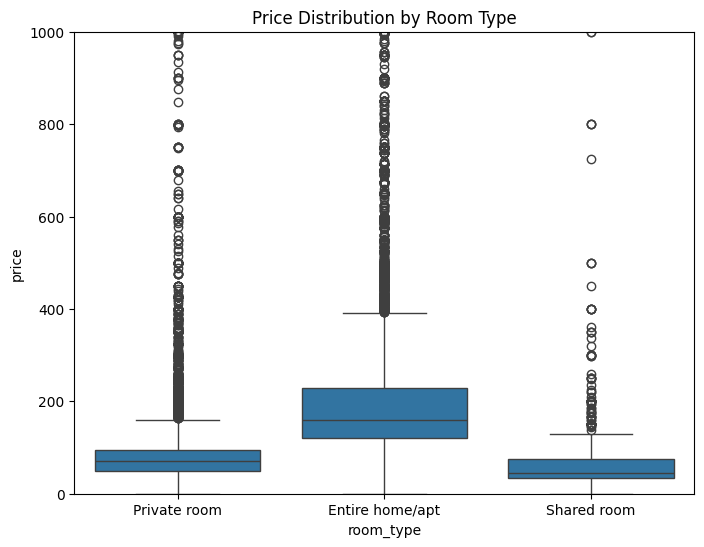

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0,1000)
plt.title("Price Distribution by Room Type")
plt.show()

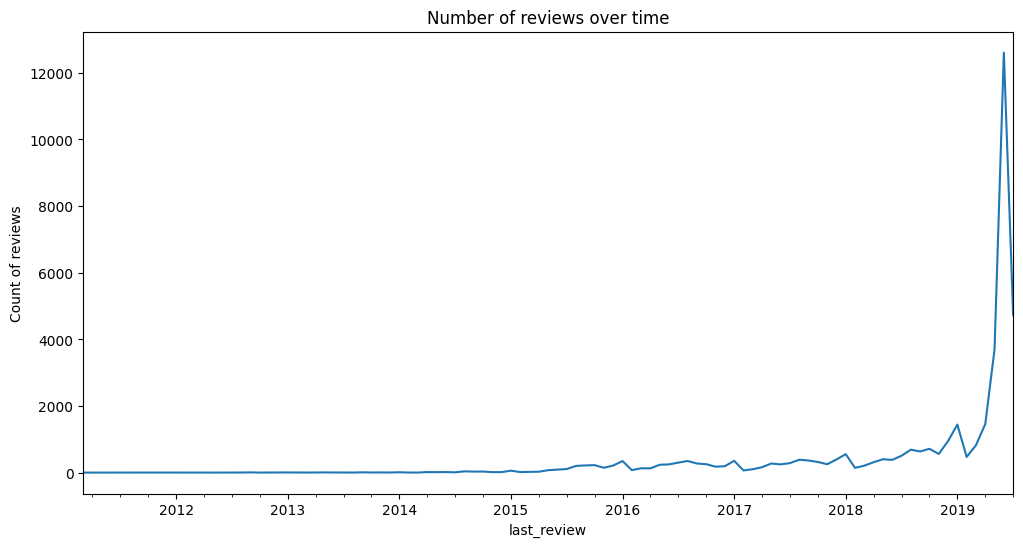

In [37]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
reviews_over_time = df.groupby(df['last_review'].dt.to_period("M")).size()
reviews_over_time.plot(figsize=(12,6))
plt.title("Number of reviews over time")
plt.ylabel("Count of reviews")
plt.show()

## ***1.Neighbourhood*** ***groups with highest count among all.***

In [38]:
df['neighbourhood_group'].value_counts().reset_index()


,neighbourhood_group,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [39]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

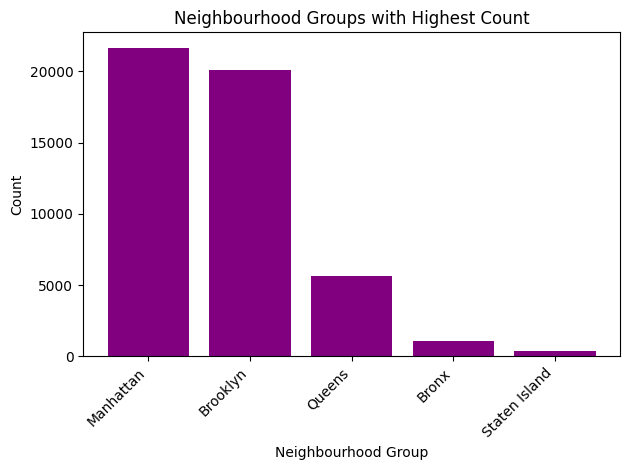

In [40]:
import matplotlib.pyplot as plt
ng_counts = df['neighbourhood_group'].value_counts()
plt.bar(ng_counts.index, ng_counts.values,color='purple')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Groups with Highest Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ***2.Availability of rooms in different areas***

In [41]:
# Availability of rooms in different areas.
availability_by_area = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
print(availability_by_area)


  neighbourhood_group  availability_365
0               Bronx        165.758937
1            Brooklyn        100.232292
2           Manhattan        111.979410
3              Queens        144.451818
4       Staten Island        199.678284


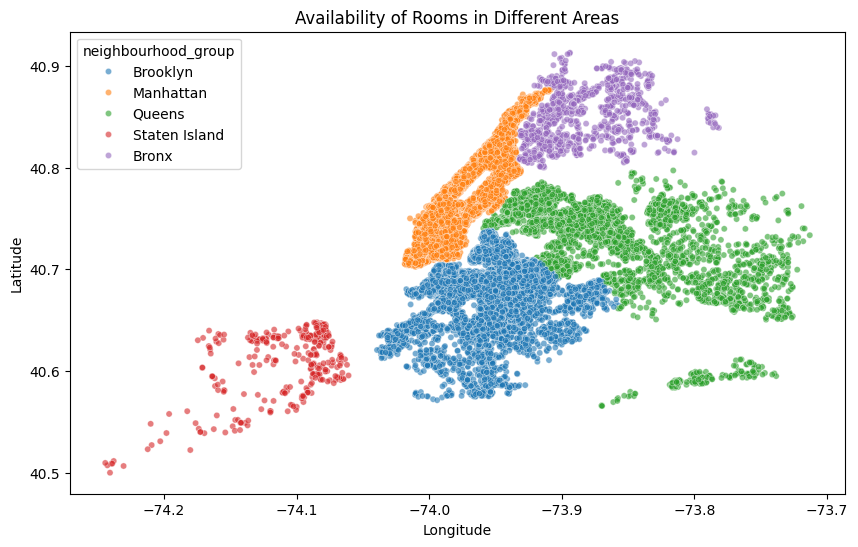

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Availability of rooms in different areas.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, s=20, alpha=0.6)
plt.title('Availability of Rooms in Different Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# ***3.Analysis of various rooms type in different areas.***

In [43]:
# Analysis of various rooms type in different areas.

room_type_by_area = df.groupby(['neighbourhood_group', 'room_type'])['id'].count().reset_index(name='count')
print(room_type_by_area)


   neighbourhood_group        room_type  count
0                Bronx  Entire home/apt    379
1                Bronx     Private room    652
2                Bronx      Shared room     60
3             Brooklyn  Entire home/apt   9559
4             Brooklyn     Private room  10132
5             Brooklyn      Shared room    413
6            Manhattan  Entire home/apt  13199
7            Manhattan     Private room   7982
8            Manhattan      Shared room    480
9               Queens  Entire home/apt   2096
10              Queens     Private room   3372
11              Queens      Shared room    198
12       Staten Island  Entire home/apt    176
13       Staten Island     Private room    188
14       Staten Island      Shared room      9


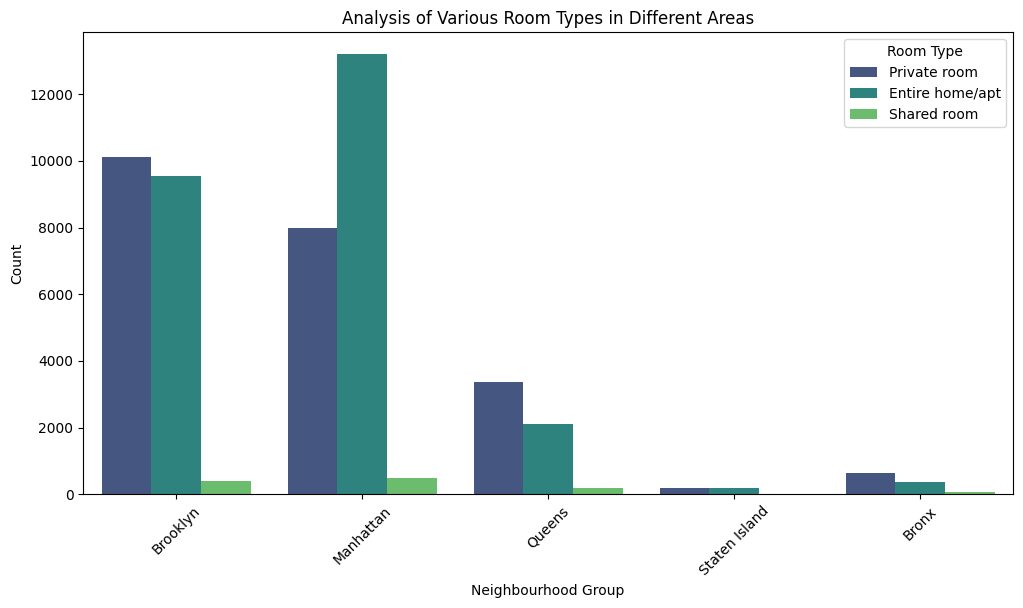

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='viridis')
plt.title('Analysis of Various Room Types in Different Areas')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


# ***4.Neighbourhood group analysis based on Latitude and Longitude***



In [45]:
# Neighbourhood group analysis based on Latitude
latitude_stats = df.groupby('neighbourhood_group')['latitude'].agg(['mean', 'min', 'max'])
print("Latitude Statistics:\n", latitude_stats)

# Neighbourhood group analysis based on Longitude
longitude_stats = df.groupby('neighbourhood_group')['longitude'].agg(['mean', 'min', 'max'])
print("\nLongitude Statistics:\n", longitude_stats)


Latitude Statistics:
                           mean       min       max
neighbourhood_group                               
Bronx                40.848305  40.80011  40.91306
Brooklyn             40.685036  40.57115  40.73890
Manhattan            40.765062  40.70234  40.87665
Queens               40.731531  40.56546  40.79721
Staten Island        40.610225  40.49979  40.64779

Longitude Statistics:
                           mean       min       max
neighbourhood_group                               
Bronx               -73.884552 -73.93190 -73.78158
Brooklyn            -73.951190 -74.03942 -73.85676
Manhattan           -73.974607 -74.01851 -73.90855
Queens              -73.872775 -73.95927 -73.71299
Staten Island       -74.105805 -74.24442 -74.06092


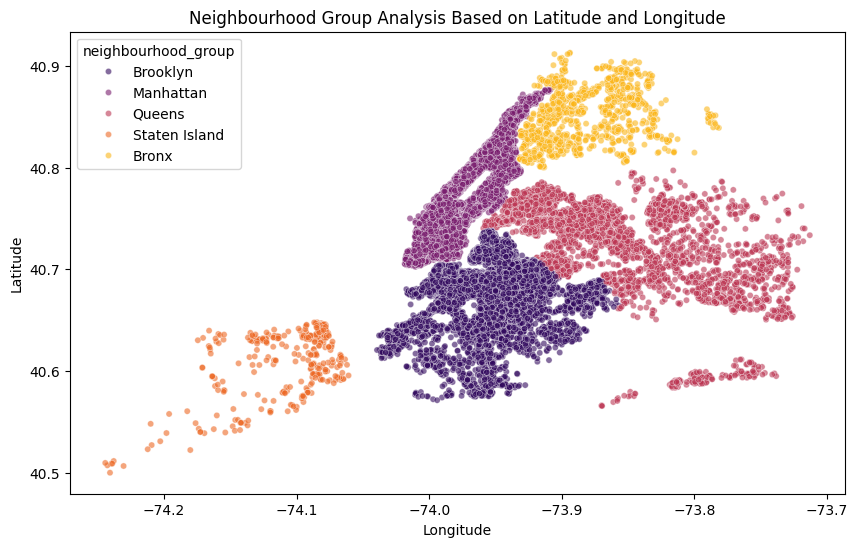

In [46]:
import matplotlib.pyplot as plt
# Neighbourhood group analysis based on Latitude and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, s=20, alpha=0.6,palette='inferno')
plt.title('Neighbourhood Group Analysis Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# ***5.Price Exploration in neighbourhood group and neighbourhood***

In [47]:
# Price Exploration in neighbourhood group and neighbourhood
price_by_neighbourhood_group = df.groupby('neighbourhood_group')['price'].describe()
print("Price statistics by neighbourhood group:\n", price_by_neighbourhood_group)

price_by_neighbourhood = df.groupby('neighbourhood')['price'].describe()
print("\nPrice statistics by neighbourhood (top 10):\n", price_by_neighbourhood.head(10))


Price statistics by neighbourhood group:
                        count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0  

Price statistics by neighbourhood (top 10):
                             count        mean         std   min     25%  \
neighbourhood                                

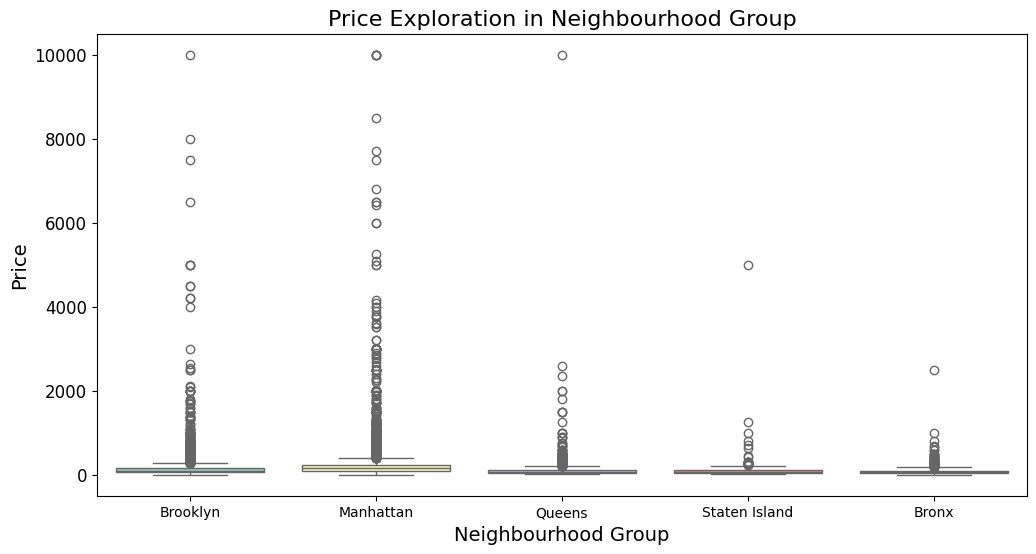

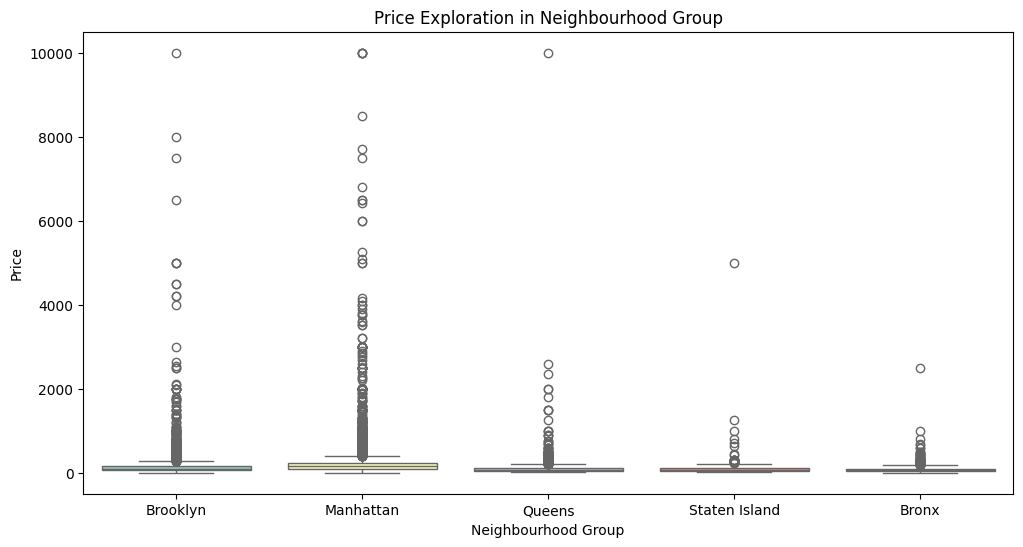

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df, hue='neighbourhood_group', palette='Set3', legend=False)
plt.title('Price Exploration in Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.yticks(fontsize=12)
plt.show()
# Exploring price distribution within a specific neighbourhood group
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df, hue='neighbourhood_group', palette='Set3', legend=False)
plt.title('Price Exploration in Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

# ***6.Price variation based on neighbourhood group and availability_365***

In [49]:
price_variation = df.groupby(['neighbourhood_group', 'availability_365'])['price'].agg(['mean', 'min', 'max']).reset_index()
print(price_variation)


     neighbourhood_group  availability_365        mean  min   max
0                  Bronx                 0   79.694915   20   680
1                  Bronx                 1  111.875000   35   299
2                  Bronx                 2   89.500000   80    99
3                  Bronx                 3   53.666667   26   100
4                  Bronx                 5   44.000000   20    79
...                  ...               ...         ...  ...   ...
1572       Staten Island               361   60.000000   60    60
1573       Staten Island               362   80.714286   55   125
1574       Staten Island               363   83.333333   50   130
1575       Staten Island               364  264.800000   50  1000
1576       Staten Island               365  163.666667   45   800

[1577 rows x 5 columns]


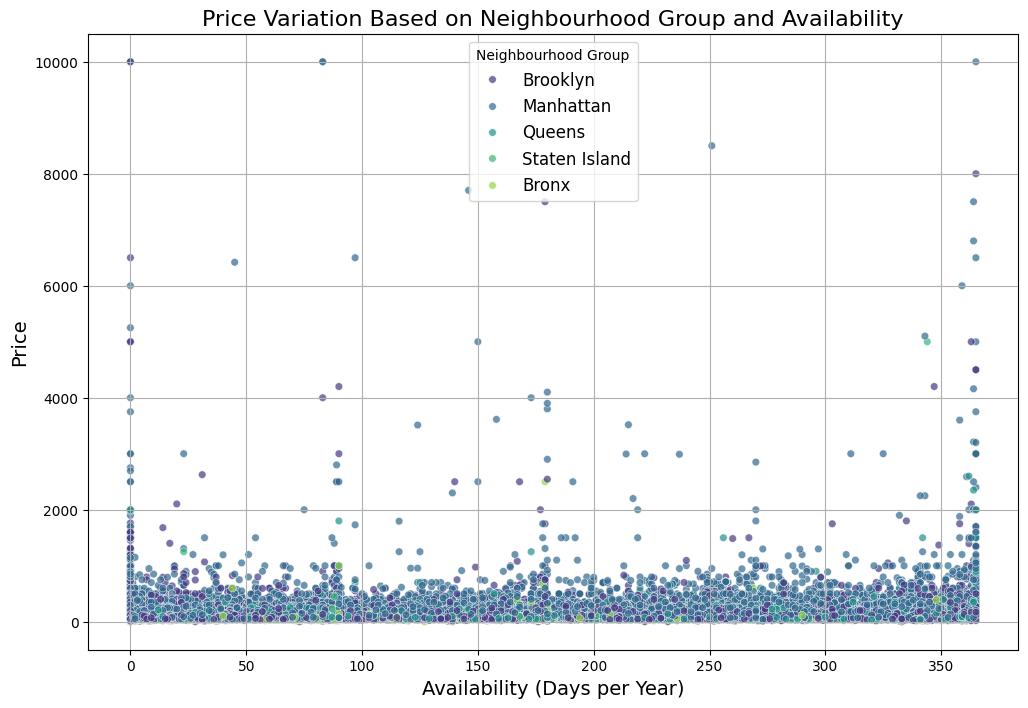

In [50]:
import matplotlib.pyplot as plt
# Price variation based on neighbourhood group and availability_365
plt.figure(figsize=(12, 8))
sns.scatterplot(x='availability_365', y='price', hue='neighbourhood_group', data=df, s=30, alpha=0.7, palette='viridis')
plt.title('Price Variation Based on Neighbourhood Group and Availability', fontsize=16)
plt.xlabel('Availability (Days per Year)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Neighbourhood Group', fontsize=12)
plt.grid(True)
plt.show()


# ***7.Relation between neighbourhood group and Availability of number of days for room***

In [51]:
#  Relation between neighbourhood group and Availability of number of days for room
availability_stats = df.groupby('neighbourhood_group')['availability_365'].describe()
print(availability_stats)


                       count        mean         std  min   25%    50%    75%  \
neighbourhood_group                                                             
Bronx                 1091.0  165.758937  135.247098  0.0  37.0  148.0  313.5   
Brooklyn             20104.0  100.232292  126.275775  0.0   0.0   28.0  188.0   
Manhattan            21661.0  111.979410  132.677836  0.0   0.0   36.0  230.0   
Queens                5666.0  144.451818  135.538597  0.0   2.0   98.0  286.0   
Staten Island          373.0  199.678284  131.852000  0.0  78.0  219.0  333.0   

                       max  
neighbourhood_group         
Bronx                365.0  
Brooklyn             365.0  
Manhattan            365.0  
Queens               365.0  
Staten Island        365.0  


/tmp/ipython-input-3013351554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='availability_365', data=df, palette='Set1',legend='false')


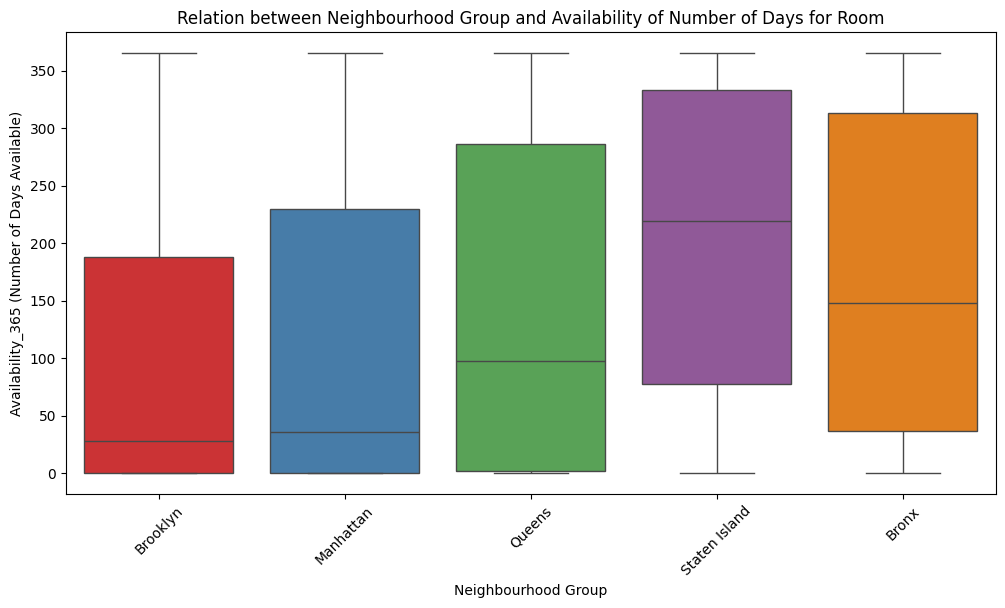

In [52]:
import matplotlib.pyplot as plt
# Relation between neighbourhood group and Availability of number of days for room.
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df, palette='Set1',legend='false')
plt.title('Relation between Neighbourhood Group and Availability of Number of Days for Room')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability_365 (Number of Days Available)')
plt.xticks(rotation=45)
plt.show()


# ***8.Number of Property owned by each neighbourhood groups.***

In [53]:
property_counts = df.groupby('neighbourhood_group')['id'].count().reset_index(name='property_count')
print(property_counts)


  neighbourhood_group  property_count
0               Bronx            1091
1            Brooklyn           20104
2           Manhattan           21661
3              Queens            5666
4       Staten Island             373


/tmp/ipython-input-3780886436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='property_count', data=property_counts, palette='plasma')


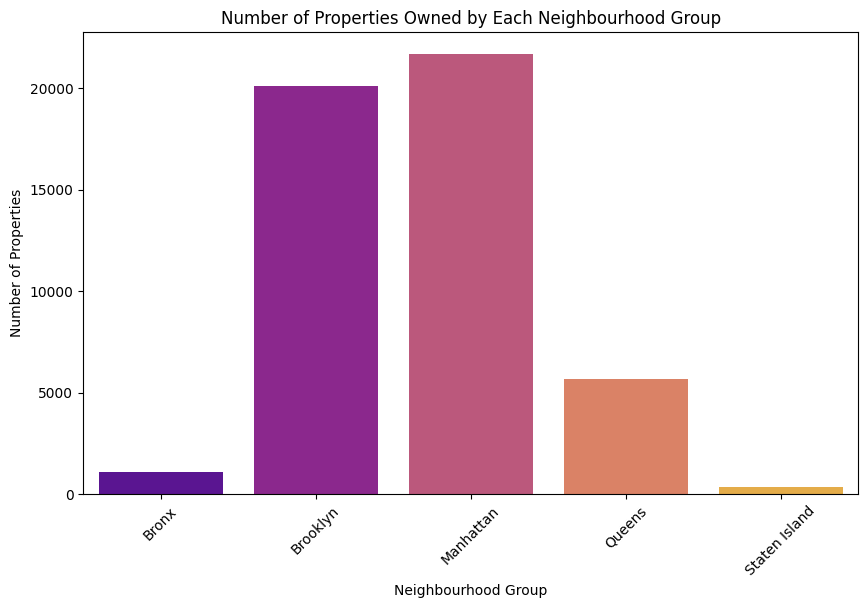

In [54]:
import matplotlib.pyplot as plt
# Number of Property owned by each neighbourhood groups.
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='property_count', data=property_counts, palette='plasma')
plt.title('Number of Properties Owned by Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()


# ***9.Different rooms distribution based on neighbourhood groups.***


In [55]:
room_distribution = df.groupby(['neighbourhood_group', 'room_type'])['id'].count().unstack(fill_value=0)
print(room_distribution)


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


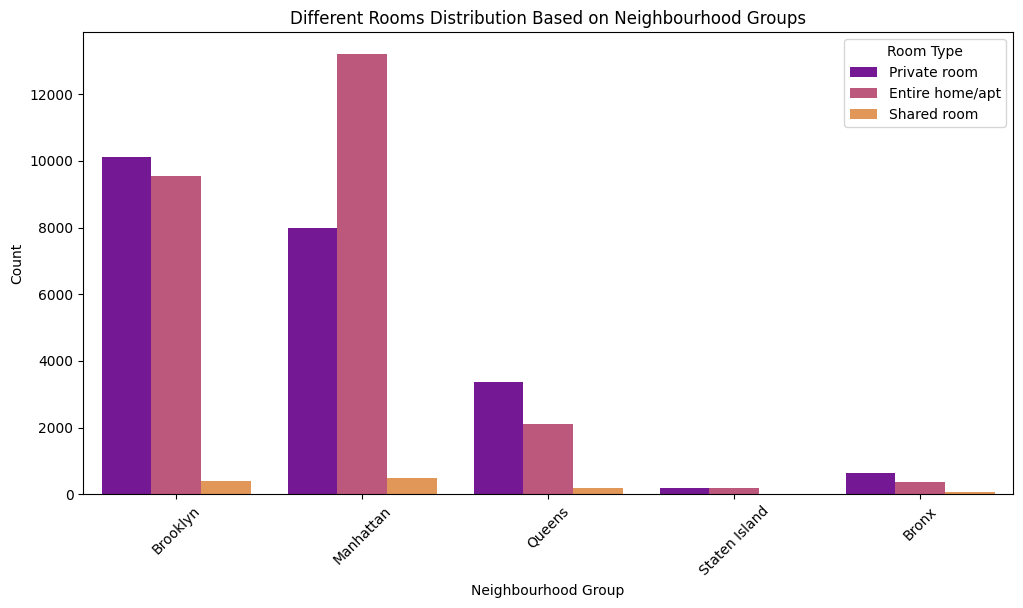

In [56]:
import matplotlib.pyplot as plt
# Different rooms distribution based on neighbourhood groups.
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='plasma')
plt.title('Different Rooms Distribution Based on Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


# ***10.Correlation among different data sets(columns).***

In [57]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.180221  0.209783 -0.018758   0.138516   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id         

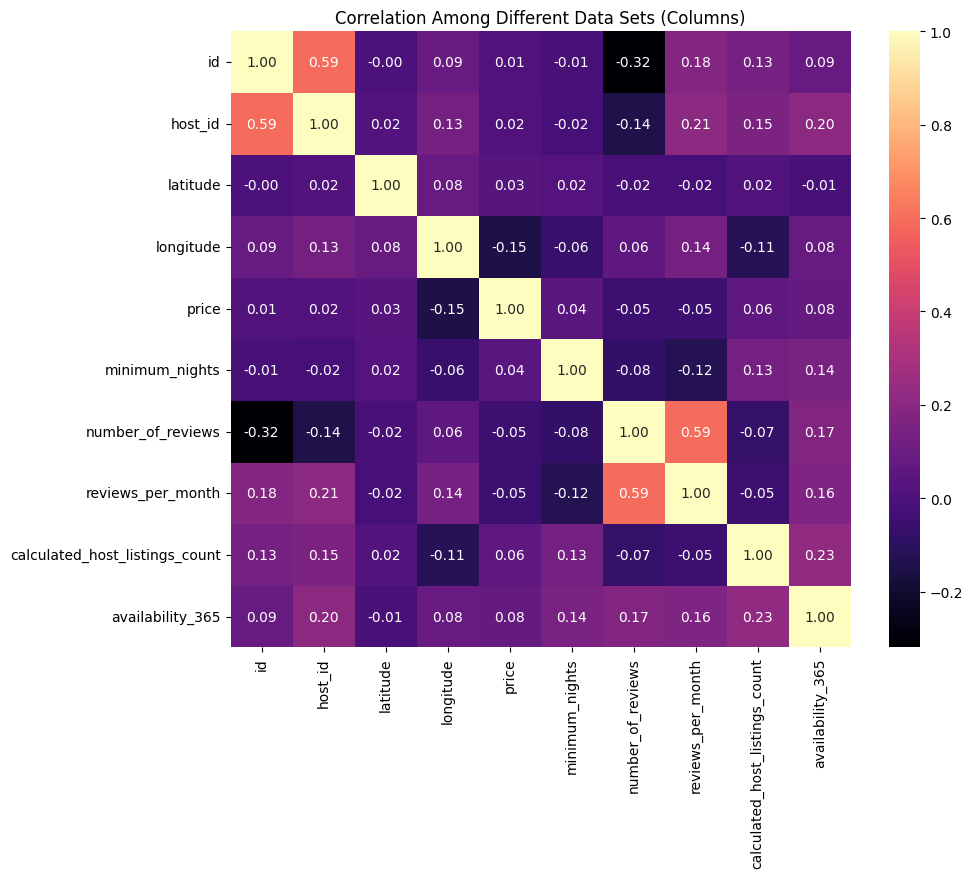

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['float', 'int']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Among Different Data Sets (Columns)')
plt.show()

# ***11.Which hosts are the busiest and why?***

In [59]:
# Calculate the number of listings per host
host_listings = df['host_id'].value_counts()

# Filter for hosts with more than a certain number of listings (e.g., 5)
busy_hosts = host_listings[host_listings > 5]

print("Busy hosts (with more than 5 listings):\n", busy_hosts)

# Further analysis to understand why these hosts are busy:

# 1. Average price of listings for busy hosts:
busy_host_avg_price = df[df['host_id'].isin(busy_hosts.index)].groupby('host_id')['price'].mean()
print("\nAverage price of listings for busy hosts:\n", busy_host_avg_price)

# 2. Distribution of room types for busy hosts:
busy_host_room_types = df[df['host_id'].isin(busy_hosts.index)].groupby(['host_id', 'room_type'])['id'].count().unstack()
print("\nDistribution of room types for busy hosts:\n", busy_host_room_types)

# 3. Average number of reviews for busy hosts:
busy_host_avg_reviews = df[df['host_id'].isin(busy_hosts.index)].groupby('host_id')['number_of_reviews'].mean()
print("\nAverage number of reviews for busy hosts:\n", busy_host_avg_reviews)

# 4. Location of listings for busy hosts:
busy_host_locations = df[df['host_id'].isin(busy_hosts.index)].groupby(['host_id', 'neighbourhood_group'])['id'].count().unstack()
print("\nLocation of listings for busy hosts:\n", busy_host_locations)

print("Possible reasons for hosts being busiest:")

print("-Professional Property Management: Some busy hosts might be managing properties for multiple owners, leading to a higher number of listings.")
print("-Popular Locations:Hosts with listings in high-demand areas tend to attract more bookings")
print("-Competitive Pricing:Offering competitive prices can increase occupancy rates and lead to more bookings")
print("-Positive Reviews: Hosts with positive reviews are more likely to attract guests.")
print("-Variety of Listings: Offering different room types can cater to a wider range of guests.")

Busy hosts (with more than 5 listings):
 host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
2787           6
5986790        6
156114168      6
271393608      6
22486          6
Name: count, Length: 345, dtype: int64

Average price of listings for busy hosts:
 host_id
2787         100.666667
22486        102.500000
51038        140.666667
61042         48.833333
295128        89.285714
                ...    
266726110     88.428571
268135013    126.666667
270874051    117.750000
271393608     69.166667
273354185     59.857143
Name: price, Length: 345, dtype: float64

Distribution of room types for busy hosts:
 room_type  Entire home/apt  Private room  Shared room
host_id                                              
2787                   NaN           5.0          1.0
22486                  NaN           6.0          NaN
51038                  2.0           4.0          NaN
61042                  NaN           6.0          NaN

# ***12.What can we learn from predictions? (ex: locations, prices, reviews, etc)***

In [60]:
print("Location:The coefficients for neighborhood groups indicate how the location affects the price.")
print("Positive coefficients suggest higher prices in those areas, while negative coefficients suggest lower prices.")
print("\nRoom Type: The coefficients for room types show how the type of accommodation influences the price.")
print("For example, entire home/apartments might have higher coefficients compared to shared rooms.")
print("\nOther Factors: The coefficients for minimum nights, number of reviews, and availability also provide insights into their impact on price.")

print("\nPredicting Reviews:")
print("While predicting the exact number of reviews might be challenging, we can use classification models to predict the sentiment of reviews (positive, negative, neutral) based on text analysis of review content.")

print("\nPredicting Location Popularity:")
print("We can use time series analysis or regression models to predict the future demand for listings in different locations based on historical booking data and seasonality trends.")

Location:The coefficients for neighborhood groups indicate how the location affects the price.
Positive coefficients suggest higher prices in those areas, while negative coefficients suggest lower prices.

Room Type: The coefficients for room types show how the type of accommodation influences the price.
For example, entire home/apartments might have higher coefficients compared to shared rooms.

Other Factors: The coefficients for minimum nights, number of reviews, and availability also provide insights into their impact on price.

Predicting Reviews:
While predicting the exact number of reviews might be challenging, we can use classification models to predict the sentiment of reviews (positive, negative, neutral) based on text analysis of review content.

Predicting Location Popularity:
We can use time series analysis or regression models to predict the future demand for listings in different locations based on historical booking data and seasonality trends.


In [61]:
# Select relevant columns
features = df[['neighbourhood_group', 'room_type', 'price']]

# Perform one-hot encoding
features = pd.get_dummies(features, columns=['neighbourhood_group', 'room_type'])

# Split into features (X) and target variable (y)
X = features.drop('price', axis=1)
y = features['price']

# Import and fit the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)

                             Feature  Coefficient
0          neighbourhood_group_Bronx   -24.622213
1       neighbourhood_group_Brooklyn    -2.779036
2      neighbourhood_group_Manhattan    54.825538
3         neighbourhood_group_Queens   -15.558248
4  neighbourhood_group_Staten Island   -11.866041
5          room_type_Entire home/apt    81.708034
6             room_type_Private room   -29.775080
7              room_type_Shared room   -51.932954


# ***13.Is there any noticeable difference of traffic among different areas and what could be the reason for it***


Number of reviews per neighborhood group:
 neighbourhood_group
Brooklyn         486574
Manhattan        454569
Queens           156950
Bronx             28371
Staten Island     11541
Name: number_of_reviews, dtype: int64

Average number of reviews per listing in each neighborhood group:
 neighbourhood_group
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Name: number_of_reviews, dtype: float64


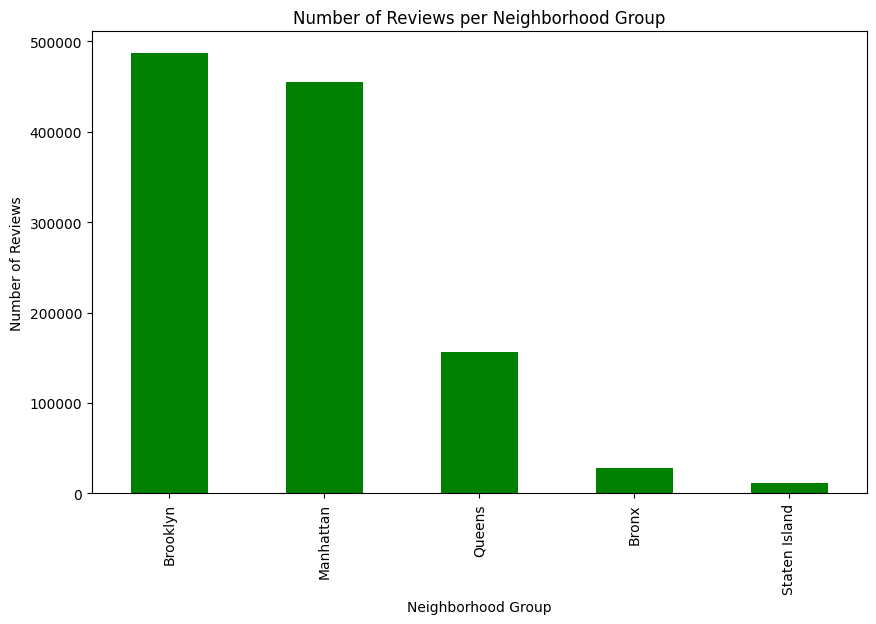


Possible reasons for differences in traffic:
- Tourist Attractions: Neighbourhoods with popular tourist attractions tend to have higher traffic.
- Accessibility: Areas with good transportation links and convenient access to amenities attract more visitors.
- Accommodation Options: Neighbourhoods with a wider variety of accommodation options, including budget-friendly choices, may experience higher traffic.
- Safety and Security: Areas perceived as safe and secure tend to be more popular among travelers.
- Events and Activities: Neighbourhoods hosting major events or offering unique experiences attract more visitors.
- Reputation and Reviews: Positive reviews and recommendations influence travelers' choices and can lead to increased traffic in certain areas.


In [62]:
import matplotlib.pyplot as plt
# Calculate the number of reviews per neighborhood group
reviews_per_neighborhood = df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)
print("\nNumber of reviews per neighborhood group:\n", reviews_per_neighborhood)

# Calculate the average number of reviews per listing in each neighborhood group
avg_reviews_per_listing = df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)
print("\nAverage number of reviews per listing in each neighborhood group:\n", avg_reviews_per_listing)

# Visualize the differences in traffic using a bar chart

plt.figure(figsize=(10, 6))
reviews_per_neighborhood.plot(kind='bar',color='green')
plt.title('Number of Reviews per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Reviews')
plt.show()

print("\nPossible reasons for differences in traffic:")
print("- Tourist Attractions: Neighbourhoods with popular tourist attractions tend to have higher traffic.")
print("- Accessibility: Areas with good transportation links and convenient access to amenities attract more visitors.")
print("- Accommodation Options: Neighbourhoods with a wider variety of accommodation options, including budget-friendly choices, may experience higher traffic.")
print("- Safety and Security: Areas perceived as safe and secure tend to be more popular among travelers.")
print("- Events and Activities: Neighbourhoods hosting major events or offering unique experiences attract more visitors.")
print("- Reputation and Reviews: Positive reviews and recommendations influence travelers' choices and can lead to increased traffic in certain areas.")


# ***14.What can we learn about different hosts and areas?***

In [63]:
# Analyzing Busy Hosts:

# Calculate the number of listings per host
host_listings = df['host_id'].value_counts()

# Identify hosts with a significant number of listings (e.g., more than 5)
busy_hosts = host_listings[host_listings > 5]
print("Busy hosts (with more than 5 listings):\n", busy_hosts)

# Investigate characteristics of busy hosts:
# 1. Average price of their listings
busy_host_avg_price = df[df['host_id'].isin(busy_hosts.index)].groupby('host_id')['price'].mean()
print("\nAverage price of listings for busy hosts:\n", busy_host_avg_price)

# 2. Distribution of room types they offer
busy_host_room_types = df[df['host_id'].isin(busy_hosts.index)].groupby(['host_id', 'room_type'])['id'].count().unstack()
print("\nDistribution of room types for busy hosts:\n", busy_host_room_types)

# 3. Average number of reviews they receive
busy_host_avg_reviews = df[df['host_id'].isin(busy_hosts.index)].groupby('host_id')['number_of_reviews'].mean()
print("\nAverage number of reviews for busy hosts:\n", busy_host_avg_reviews)

# 4. Location of their listings
busy_host_locations = df[df['host_id'].isin(busy_hosts.index)].groupby(['host_id', 'neighbourhood_group'])['id'].count().unstack()
print("\nLocation of listings for busy hosts:\n", busy_host_locations)

print("Possible reasons for hosts being busy:")
print("- Professional Property Management: Managing properties for multiple owners.")
print("- Popular Locations: Listings in high-demand areas.")
print("- Competitive Pricing: Attractive prices leading to higher occupancy.")
print("- Positive Reviews: Good reputation attracting more guests.")
print("- Variety of Listings: Catering to a wider range of preferences.")

# Analyzing Neighborhood Traffic:

# Calculate the number of reviews per neighborhood group
reviews_per_neighborhood = df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)
print("\nNumber of reviews per neighborhood group:\n", reviews_per_neighborhood)

# Calculate the average number of reviews per listing in each neighborhood group
avg_reviews_per_listing = df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)
print("\nAverage number of reviews per listing in each neighborhood group:\n", avg_reviews_per_listing)

print("Possible reasons for differences in neighborhood traffic:")
print("- Attractiveness of the Area: Tourist attractions, landmarks, nightlife.")
print("- Accessibility: Good transportation links and proximity to amenities.")
print("- Price: Affordable accommodations attracting budget-conscious travelers.")
print("- Listing Density: Competition affecting booking rates.")
print("- Reputation and Reviews: Positive reviews attracting more guests.")
print("- Seasonality: Events, festivals, or weather influencing traffic.")
print("\nFurther analysis to investigate neighborhood traffic:")
print("- Correlation with Listing Prices: Analyze the relationship between prices and reviews.")
print("- Mapping Listings and Attractions: Visualize the distribution of listings and nearby attractions.")
print("- Sentiment Analysis of Reviews: Understand guest experiences and preferences in different neighborhoods.")
print("- Time Series Analysis: Examine booking trends over time to identify seasonal variations.")


Busy hosts (with more than 5 listings):
 host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
2787           6
5986790        6
156114168      6
271393608      6
22486          6
Name: count, Length: 345, dtype: int64

Average price of listings for busy hosts:
 host_id
2787         100.666667
22486        102.500000
51038        140.666667
61042         48.833333
295128        89.285714
                ...    
266726110     88.428571
268135013    126.666667
270874051    117.750000
271393608     69.166667
273354185     59.857143
Name: price, Length: 345, dtype: float64

Distribution of room types for busy hosts:
 room_type  Entire home/apt  Private room  Shared room
host_id                                              
2787                   NaN           5.0          1.0
22486                  NaN           6.0          NaN
51038                  2.0           4.0          NaN
61042                  NaN           6.0          NaN